# Assignment 7

In [51]:

from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from collections import Counter
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [2]:
df_insuarance = pd.read_csv('insurance.csv')
df_insuarance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
df_insuarance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df_insuarance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Considering the target column is continous in nature, a regression approach is requred in conducting predictive analysis on the data.

<AxesSubplot:ylabel='Frequency'>

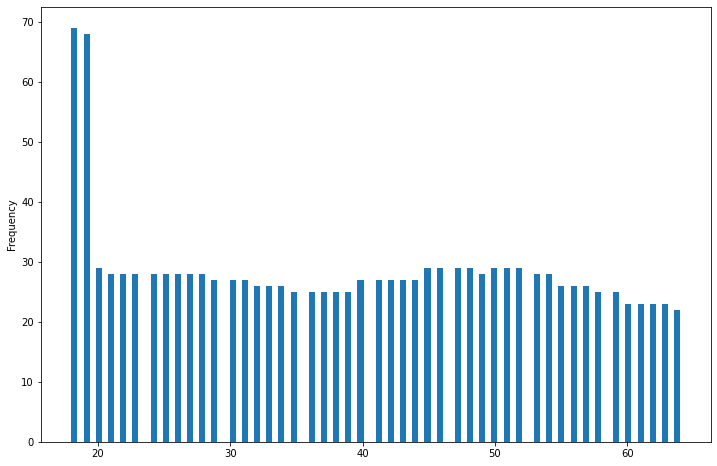

In [5]:
df_insuarance['age'].plot(kind = 'hist', figsize = (12, 8), bins = 100)

Majority of the individuals captured in the data are below 20 years of age. As from 30 to 70 years of age, there was a balance of the individuals in the data.

In [6]:
numerical_continuous = []
for column in df_insuarance.columns:
    if df_insuarance[column].dtypes != 'object':
        if df_insuarance[column].nunique() >= 10:
            numerical_continuous.append(column)
numerical_continuous.remove('charges')
numerical_continuous

['age', 'bmi']

In [7]:
numerical_discrete = []
for column in df_insuarance.columns:
    if df_insuarance[column].dtypes != 'object':
        if df_insuarance[column].nunique() < 10:
            numerical_discrete.append(column)
numerical_discrete

['children']

<AxesSubplot:>

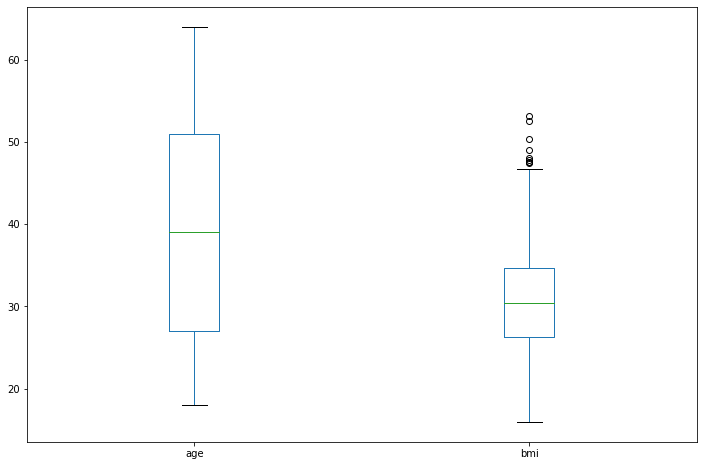

In [8]:
df_insuarance[numerical_continuous].plot(kind = 'box', figsize = (12, 8))

<AxesSubplot:>

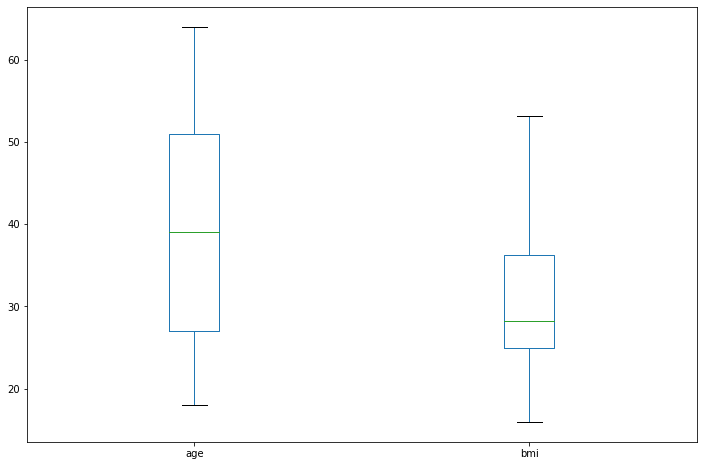

In [9]:
threshold = 0.3705
zscore = np.abs(stats.zscore(df_insuarance[['bmi']]))
df_insuarance[(zscore > threshold).all(axis=1)][numerical_continuous].plot(kind = 'box', figsize = (12, 8))

In [10]:
df_insuarance = df_insuarance[(zscore > threshold).all(axis = 1)]

In [11]:
categorical = []
for column in df_insuarance.columns:
    if df_insuarance[column].dtypes == 'object':
        categorical.append(column)
categorical

['sex', 'smoker', 'region']

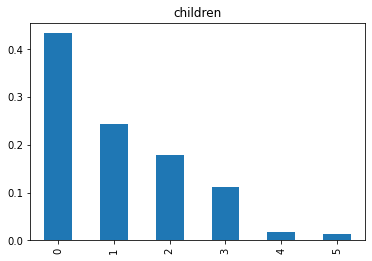

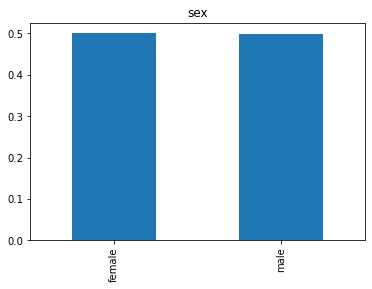

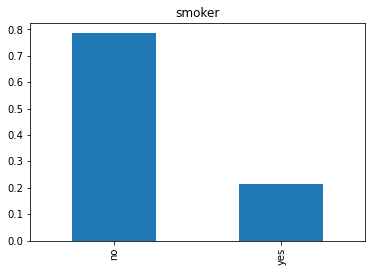

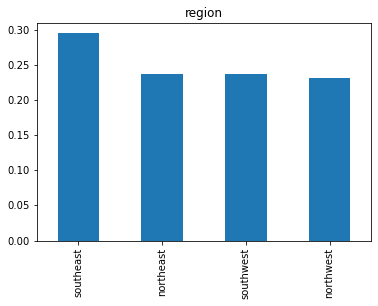

In [12]:
import matplotlib.pyplot as plt
for column in numerical_discrete + categorical:
    (df_insuarance[column].value_counts()/df_insuarance[column].shape[0]).plot(kind = 'bar')
    plt.title(column)
    plt.show()

In [13]:
df_insuarance['children'] = df_insuarance['children'].replace([3, 4, 5], 'Rare')

In [14]:
#mode
#mean
#median

encoded_features = {}
for column in numerical_discrete + categorical:
    encoded_features[column] = df_insuarance.groupby([column])['charges'].median().to_dict()
    df_insuarance[column] = df_insuarance[column].map(encoded_features[column])

In [15]:
encoded_features

{'children': {0: 9644.2525, 1: 8539.671, 2: 9954.0544, 'Rare': 10977.2063},
 'sex': {'female': 9639.395250000001, 'male': 9391.346},
 'smoker': {'no': 7345.4053, 'yes': 29330.98315},
 'region': {'northeast': 9661.16525,
  'northwest': 9301.89355,
  'southeast': 9768.88825,
  'southwest': 9328.071499999998}}

In [16]:
X = df_insuarance.drop('charges', axis = 1)
y = df_insuarance['charges']

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

model = LinearRegression()
rfe = RFE(model, 5)
X_rfe = rfe.fit_transform(X, y)  
model.fit(X_rfe, y)
print(pd.Series(rfe.support_, index = X.columns))

age          True
sex          True
bmi          True
children    False
smoker       True
region       True
dtype: bool


The column *children* had to be dropped according to the RFE. This could have been as a result of the combined rare levels analysis that could have compromised the integrity of the feature.

# Assignment-8

# Qn-1: Convert the target labels to their respective log values and give 2 reasons why this step may be useful as we train the machine learning model. (Explain in a markdown cell.)

In [64]:
#Dropping column chidren
X = df_insuarance.drop(['charges','children'], axis = 1).astype(int)
y = df_insuarance['charges'].astype(int)

In [62]:
X.dtypes

age       int32
sex       int32
bmi       int32
smoker    int32
region    int32
dtype: object

In [65]:
X.describe()

,age,sex,bmi,smoker,region
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,39.257467,9515.127703,30.187436,12077.095778,9530.219361
std,14.083098,124.063835,7.137955,9040.274478,206.420930
min,18.000000,9391.000000,15.000000,7345.000000,9301.000000
25%,27.000000,9391.000000,24.000000,7345.000000,9328.000000
50%,39.000000,9639.000000,28.000000,7345.000000,9661.000000
75%,51.000000,9639.000000,36.000000,7345.000000,9768.000000
max,64.000000,9639.000000,53.000000,29330.000000,9768.000000


In [66]:
Log_charges = df_insuarance[['charges']].apply(np.log, axis = 1).round(3)

In [67]:
Log_charges.describe()

,charges
count,971.000000
mean,9.102619
std,0.927864
min,7.023000
25%,8.467500
50%,9.166000
75%,9.746000
max,11.063000


In [68]:
y.describe()

count      971.000000
mean     13357.900103
std      12157.950610
min       1121.000000
25%       4757.500000
50%       9563.000000
75%      17083.000000
max      63770.000000
Name: charges, dtype: float64

In [123]:
#Normalizing the features
Log_X = df_insuarance[['age','sex','bmi','smoker','region']].apply(np.log, axis = 1).round(3)

In [70]:
Log_X.describe()

,age,sex,bmi,smoker,region
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,3.598203,9.161013,3.395851,9.199895,9.162144
std,0.391734,0.013007,0.236000,0.569103,0.021654
min,2.890000,9.148000,2.770000,8.902000,9.138000
25%,3.296000,9.148000,3.218000,8.902000,9.141000
50%,3.664000,9.174000,3.340000,8.902000,9.176000
75%,3.932000,9.174000,3.590500,8.902000,9.187000
max,4.159000,9.174000,3.973000,10.286000,9.187000


In [71]:
Log_X.dtypes

age       float64
sex       float64
bmi       float64
smoker    float64
region    float64
dtype: object

In [122]:
X.describe()

,age,sex,bmi,smoker,region
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,39.257467,9515.127703,30.187436,12077.095778,9530.219361
std,14.083098,124.063835,7.137955,9040.274478,206.420930
min,18.000000,9391.000000,15.000000,7345.000000,9301.000000
25%,27.000000,9391.000000,24.000000,7345.000000,9328.000000
50%,39.000000,9639.000000,28.000000,7345.000000,9661.000000
75%,51.000000,9639.000000,36.000000,7345.000000,9768.000000
max,64.000000,9639.000000,53.000000,29330.000000,9768.000000


# Two(2) reasons why this step may be useful as we train the machine learning model.

1.It helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

2.It also decreases the effect of the outliers, due to the normalization of magnitude differences and the model becomes more robust.

# Qn-2: Slice the selected feature columns and the labels into the training and testing set. Also ensure your features are normalized.

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, Y_train, Y_test = train_test_split(Log_X,Log_charges, test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train).astype(int)
X_test = scaler.transform(X_test).astype(int)
Y_train = scaler.fit_transform(Y_train).astype(int)
Y_test = scaler.transform(Y_test).astype(int)

In [131]:
#len(X_test) # 195
len(X_train) # 776
len(df_insuarance)#971

971

# Qn-3:Use at least 4 different regression based machine learning methods and use the training and testing cross accuracy and divergence to identify the best model.



In [140]:
#using LogisticRegression(),KNeighborsClassifier(),SVC() and 
from sklearn.linear_model import LinearRegression
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

# The training cross accuracy and divergence

In [141]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 4) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 82.22 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 78.10000000000001 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 78.22 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 78.48 % accuracy score


# The test cross accuracy and divergence

In [142]:
from sklearn.model_selection import cross_val_score
for key, classifier in classifiers.items():
    classifier.fit(X_test, Y_test)
    testing_score = cross_val_score(classifier, X_test, Y_test, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a testing score of", round(testing_score.mean(), 4) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a testing score of 85.64 % accuracy score
Classifiers:  KNeighborsClassifier Has a testing score of 81.03 % accuracy score
Classifiers:  DecisionTreeClassifier Has a testing score of 83.08 % accuracy score
Classifiers:  RandomForestClassifier Has a testing score of 84.1 % accuracy score


# The best model.

The best machine learning method based on the training and test scores is Logistic Regression Classifier

# Qn-4: After identifying the best model, train it with the training data again. Using at least 3 model evaluation metrics in regression, evaluate the models training and testing score. Also ensure as you test the models, the predicted and actual targets have been converted back to the original values using antilog. (Hint: Antilog function is equal to Exponential)

In [199]:
model = LogisticRegression()
model.fit(X_train,Y_train)
train_scorerf = round(model.score(X_train,Y_train),4)
print(train_scorerf)

0.8235


In [166]:
from sklearn.model_selection import GridSearchCV

#Getting the best Logistic Regression
model = LogisticRegression()
model_params = {"penalty": ['l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(model, model_params)
grid_logistic.fit(X_train, Y_train)
model_best = grid_logistic.best_estimator_

In [167]:
model = model_best

# Using accuracy,accuracy score,cross validation score, classification report and confusion matrix to evaluate the models testing score.

In [168]:
#Using Accuracy Score
Y_pred=model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
accuracy

0.8666666666666667

In [169]:
#Using Accuracy/ model score
model.score(X_test, Y_test)

0.8666666666666667

In [172]:
#Using Cross validation Score
cross_val_score(model, X_test, Y_test)

array([0.82051282, 0.8974359 , 0.92307692, 0.76923077, 0.87179487])

In [218]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix

#y_preds = lr_best.predict(X_test)
cm_lr = confusion_matrix(Y_test, Ytest_pred)
lr_acc_score = accuracy_score(Y_test, Ytest_pred)
print("confussion matrix")
print(cm_lr)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

confussion matrix
[[  0   1   0   0   0]
 [  0  20   7   0   0]
 [  0   3 126   2   0]
 [  0   0  12  23   0]
 [  0   0   0   1   0]]


Accuracy of Logistic Regression: 86.66666666666667 



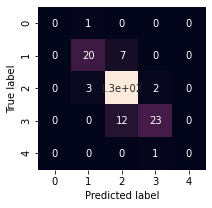

In [177]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(Y_test, Ytest_pred)

plot_conf_mat(conf_mat)

In [175]:
#Using Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_test, Ytest_pred))

Classification Report
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         1
          -1       0.83      0.74      0.78        27
           0       0.87      0.96      0.91       131
           1       0.88      0.66      0.75        35
           2       0.00      0.00      0.00         1

    accuracy                           0.87       195
   macro avg       0.52      0.47      0.49       195
weighted avg       0.86      0.87      0.86       195



# Also ensure as you test the models, the predicted and actual targets have been converted back to the original values using antilog. (Hint: Antilog function is equal to Exponential)

In [178]:
#Coverting Log_X features to Anti Log
AntiLog_X = Log_X[['age','sex','bmi','smoker','region']].apply(np.exp, axis = 1).round(3).astype(int)

In [179]:
AntiLog_X.describe()

,age,sex,bmi,smoker,region
count,971.000000,971.000000,971.000000,971.000000,971.000000
mean,38.688980,9519.127703,30.180227,12075.512873,9531.456231
std,14.130689,124.063835,7.140812,9035.340055,206.188951
min,17.000000,9395.000000,15.000000,7346.000000,9302.000000
25%,27.000000,9395.000000,24.000000,7346.000000,9330.000000
50%,39.000000,9643.000000,28.000000,7346.000000,9662.000000
75%,51.000000,9643.000000,36.000000,7346.000000,9769.000000
max,64.000000,9643.000000,53.000000,29319.000000,9769.000000


In [157]:
AntiLog_X.dtypes

age       int32
sex       int32
bmi       int32
smoker    int32
region    int32
dtype: object

In [180]:
#Coverting Target Label to AntiLog 
AntiLog_charges = Log_charges[['charges']].apply(np.exp, axis = 1).round(3).astype(int)

In [181]:
AntiLog_charges.describe()

,charges
count,971.000000
mean,13357.770340
std,12157.897687
min,1122.000000
25%,4757.000000
50%,9566.000000
75%,17085.000000
max,63767.000000


In [182]:
A_train, A_test, B_train, B_test = train_test_split(AntiLog_X,AntiLog_charges, test_size=0.2)
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train).astype(int)
A_test = scaler.transform(A_test).astype(int)
B_train = scaler.fit_transform(B_train).astype(int)
B_test = scaler.transform(B_test).astype(int)

In [187]:
#Using Accuracy Score
B_pred=model.predict(A_test)
accuracy=accuracy_score(B_test,B_pred)
accuracy

0.9025641025641026

In [188]:
#Using Accuracy/ model score
model.score(A_test, B_test)

0.9025641025641026

In [189]:
#Using Cross validation Score
cross_val_score(model, A_test, B_test)

array([0.8974359 , 0.8974359 , 0.87179487, 0.87179487, 0.8974359 ])

In [217]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix

#y_preds = lr_best.predict(X_test)
cm_lr = confusion_matrix(B_test, Btest_pred)
lr_acc_score = accuracy_score(B_test, Btest_pred)
print("confussion matrix")
print(cm_lr)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

confussion matrix
[[  0   1   0   0   0]
 [  0 166   0   1   0]
 [  0   8   0   3   0]
 [  0   5   0  10   0]
 [  0   1   0   0   0]]


Accuracy of Logistic Regression: 90.25641025641026 



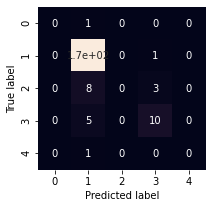

In [194]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(B_test, Btest_pred)

plot_conf_mat(conf_mat)

In [196]:
#Using Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(B_test, Btest_pred))

Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         1
           0       0.92      0.99      0.95       167
           1       0.00      0.00      0.00        11
           2       0.71      0.67      0.69        15
           3       0.00      0.00      0.00         1

    accuracy                           0.90       195
   macro avg       0.33      0.33      0.33       195
weighted avg       0.84      0.90      0.87       195



# Using accuracy,accuracy score,cross validation score, classification report and confusion matrix to evaluate the models training Score score.

In [205]:
#Using Accuracy Score
model = model_best
Ytrain_pred=model.predict(X_train)
accuracy=accuracy_score(Y_train,Y_pred)
accuracy

0.6404639175257731

In [206]:
#Using Accuracy/ model score
model.score(X_train, Y_train)

0.6404639175257731

In [207]:
#Using Cross validation Score
cross_val_score(model, X_train, Y_train)

array([0.82051282, 0.81935484, 0.84516129, 0.78709677, 0.83870968])

In [208]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix

#y_preds = lr_best.predict(X_test)
cm_lr = confusion_matrix(Y_train, Ytrain_pred)
lr_acc_score = accuracy_score(Y_train, Ytrain_pred)
print("confussion matrix")
print(cm_lr)
print("\n")
print("Accuracy of Linear Regression:",lr_acc_score*100,'\n')

confussion matrix
[[  0   0  15   0   0]
 [  0   0 129   0   0]
 [  0   0 496   0   7]
 [  0   0  73   0  54]
 [  0   0   1   0   1]]


Accuracy of Linear Regression: 64.0463917525773 



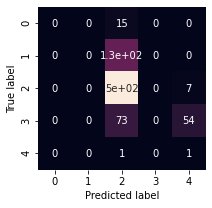

In [209]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(Y_train, Ytrain_pred)

plot_conf_mat(conf_mat)

In [210]:
#Using Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(Y_train, Ytrain_pred))

Classification Report
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00        15
          -1       0.00      0.00      0.00       129
           0       0.69      0.99      0.82       503
           1       0.00      0.00      0.00       127
           2       0.02      0.50      0.03         2

    accuracy                           0.64       776
   macro avg       0.14      0.30      0.17       776
weighted avg       0.45      0.64      0.53       776



# Also ensure as you test the models, the predicted and actual targets have been converted back to the original values using antilog. (Hint: Antilog function is equal to Exponential)

In [213]:
#Using Accuracy Score
Btrain_pred=model.predict(A_train)
accuracy=accuracy_score(B_train,Btrain_pred)
accuracy

0.8853092783505154

In [214]:
#Using Accuracy/ model score
model.score(A_train, B_train)

0.8853092783505154

In [215]:
#Using Cross validation Score
cross_val_score(model, A_train, B_train)

array([0.87820513, 0.88387097, 0.88387097, 0.87741935, 0.88387097])

In [216]:
#Using Confusion Matrix
from sklearn.metrics import confusion_matrix

#y_preds = lr_best.predict(X_test)
cm_lr = confusion_matrix(B_train, Btrain_pred)
lr_acc_score = accuracy_score(B_train, Btrain_pred)
print("confussion matrix")
print(cm_lr)
print("\n")
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

confussion matrix
[[  0  11   0   0   0   0]
 [  0 647   0   8   0   0]
 [  0  39   0   7   0   0]
 [  0  20   0  40   0   0]
 [  0   2   0   1   0   0]
 [  0   0   0   1   0   0]]


Accuracy of Logistic Regression: 88.53092783505154 



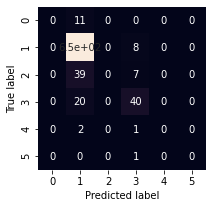

In [219]:
import seaborn as sns 
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(conf_mat,
                     annot=True, # Annotate the boxes 
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label');

conf_mat=confusion_matrix(B_train, Btrain_pred)

plot_conf_mat(conf_mat)

In [220]:
#Using Classification Report
from sklearn.metrics import classification_report
print("Classification Report")
print(classification_report(B_train, Btrain_pred))

Classification Report
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        11
           0       0.90      0.99      0.94       655
           1       0.00      0.00      0.00        46
           2       0.70      0.67      0.68        60
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1

    accuracy                           0.89       776
   macro avg       0.27      0.28      0.27       776
weighted avg       0.81      0.89      0.85       776

